<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/EDPParabolicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Metodo explicito

In [58]:
L=10
dx=2
dt=0.1
alfa=0.835
lamda=alfa*dt/dx**2
Tx0=100
Tx10=50

n=200
m=L//dx

u=np.zeros((m+1,n))
u[0,]=Tx0
u[m,]=Tx10
u

array([[100., 100., 100., ..., 100., 100., 100.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [ 50.,  50.,  50., ...,  50.,  50.,  50.]])

In [59]:
for tj in range(n-1):
  for xi in range(1,m):
    u[xi,tj+1]=(1-2*lamda)*u[xi,tj]+lamda*(u[xi+1,tj]+u[xi-1,tj])

u[:,:3]

array([[1.00000000e+02, 1.00000000e+02, 1.00000000e+02],
       [0.00000000e+00, 2.08750000e+00, 4.08784688e+00],
       [0.00000000e+00, 0.00000000e+00, 4.35765625e-02],
       [0.00000000e+00, 0.00000000e+00, 2.17882812e-02],
       [0.00000000e+00, 1.04375000e+00, 2.04392344e+00],
       [5.00000000e+01, 5.00000000e+01, 5.00000000e+01]])

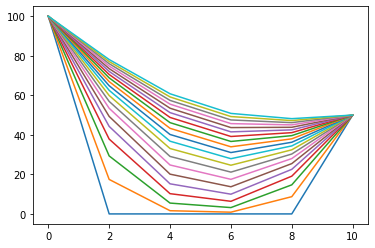

In [60]:
plt.plot(np.linspace(0,L,m+1),u[:,::10]);

#Metodo implicito simple

In [62]:
L=10
dx=2
dt=0.1
alfa=0.835
lamda=alfa*dt/dx**2
T0=0
Tx0=100
Tx10=50

In [63]:
n=200
m=L//dx-1
u=np.zeros((m+2,n))
u[0,]=Tx0
u[m+1,]=Tx10
u[1:m,0]=T0
u

array([[100., 100., 100., ..., 100., 100., 100.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [ 50.,  50.,  50., ...,  50.,  50.,  50.]])

In [72]:
A=np.zeros((m,m))
b=np.zeros(m)
A

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [73]:
A[0,0:2]=np.array([1+2*lamda,-lamda]) #primer renglon

#renglones intermedios
for i in range(m-2):
  A[i+1,i:i+3]=np.array([-lamda,1+2*lamda,-lamda])

#ultimo renglon
A[i+2,i+1:i+3]=np.array([-lamda,1+2*lamda])

A

array([[ 1.04175 , -0.020875,  0.      ,  0.      ],
       [-0.020875,  1.04175 , -0.020875,  0.      ],
       [ 0.      , -0.020875,  1.04175 , -0.020875],
       [ 0.      ,  0.      , -0.020875,  1.04175 ]])

In [74]:
#ciclo del tiempo
for j in range(n-1):
  b[0]=u[1,j]+lamda*u[0,j+1] #primer renglon

  #renglones intermedios
  for i in range(m-2):
    b[i+1]=u[i+2,j]

  #ultimo renglon
  b[m-1]=u[m,j]+lamda*u[m+1,j+1]

  #solucions del sistema
  sol=np.linalg.solve(A,b)

  #asinga los resultados
  u[1:m+1,j+1]=sol

u[:,:4]

array([[1.00000000e+02, 1.00000000e+02, 1.00000000e+02, 1.00000000e+02],
       [0.00000000e+00, 2.00465303e+00, 3.93053648e+00, 5.78151161e+00],
       [0.00000000e+00, 4.05888074e-02, 1.18962699e-01, 2.32490709e-01],
       [0.00000000e+00, 2.08985938e-02, 6.18268666e-02, 1.21937311e-01],
       [0.00000000e+00, 1.00233862e+00, 1.96532686e+00, 2.89092614e+00],
       [5.00000000e+01, 5.00000000e+01, 5.00000000e+01, 5.00000000e+01]])

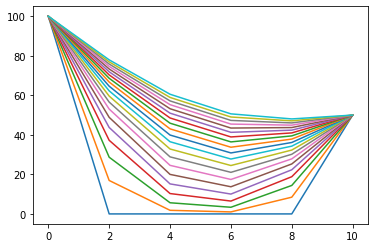

In [75]:
plt.plot(np.linspace(0,L,m+2),u[:,::10]);

#Metodo implicito de Crack-Nicolson

In [76]:
L=10
dx=2
dt=0.1
alfa=0.835
lamda=alfa*dt/dx**2
T0=0
Tx0=100
Tx10=50

In [77]:
n=200
m=L//dx-1
u=np.zeros((m+2,n))
u[0,]=Tx0
u[m+1,]=Tx10
u[1:m,0]=T0
u

array([[100., 100., 100., ..., 100., 100., 100.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [ 50.,  50.,  50., ...,  50.,  50.,  50.]])

In [94]:
u=np.zeros((m+2,n))
u[0,]=Tx0
u[m+1,]=Tx10
u[1:m,0]=T0

A=np.zeros((m,m))
b=np.zeros(m)

A[0,0:2]=np.array([2*(lamda+1),-lamda]) #primer renglon

#renglones intermedios
for i in range(m-2):
  A[i+1,i:i+3]=np.array([-lamda,2*(lamda+1),-lamda])

#ultimo renglon
A[i+2,i+1:i+3]=np.array([-lamda,2*(lamda+1)])

A

array([[ 2.04175 , -0.020875,  0.      ,  0.      ],
       [-0.020875,  2.04175 , -0.020875,  0.      ],
       [ 0.      , -0.020875,  2.04175 , -0.020875],
       [ 0.      ,  0.      , -0.020875,  2.04175 ]])

In [133]:
u=np.zeros((m+2,n))
u[0,]=Tx0
u[m+1,]=Tx10
u[1:m,0]=T0
print(u)
A=np.zeros((m,m))
b=np.zeros(m)

A[0,0:2]=np.array([2*(lamda+1),-lamda]) #primer renglon

#renglones intermedios
for i in range(m-2):
  A[i+1,i:i+3]=np.array([-lamda,2*(lamda+1),-lamda])

#ultimo renglon
A[i+2,i+1:i+3]=np.array([-lamda,2*(lamda+1)])

#ciclo del tiempo
for j in range(n-1):
  b[0]=lamda*u[0,j]+2*(lamda-1)*u[1,j]+lamda*u[2,j]+lamda*u[0,j+1] #primer renglon

  #renglones intermedios
  for i in range(1,m-1):
    b[i]=lamda*u[i,j]+2*(lamda-1)*u[i,j]+lamda*u[i+1,j]
    if j==1:
      print(f'{lamda}*{u[i,j]}+2*({lamda}-1)*{u[i,j]}+{lamda}*{u[i+1,j]}')

  #ultimo renglon
  b[m-1]=lamda*u[m-1,j]+2*(lamda-1)*u[m-1,j]+lamda*u[m+1,j]+lamda*u[m+1,j]
  if j==1:
    print(f'{lamda}*{u[m-1,j]}+2*({lamda}-1)*{u[m-1,j]}+{lamda}*{u[m+1,j]}+{lamda}*{u[m+1,j+1]}')

  if j==1:
    print(b)
  #solucions del sistema
  sol=np.linalg.solve(A,b)

  #asinga los resultados
  u[1:m+1,j+1]=sol

u[:,:3]

[[100. 100. 100. ... 100. 100. 100.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [ 50.  50.  50. ...  50.  50.  50.]]
0.020875*2.045029382945638+2*(0.020875-1)*2.045029382945638+0.020875*0.021017610982310284
0.020875*0.021017610982310284+2*(0.020875-1)*0.021017610982310284+0.020875*0.010669166665476905
0.020875*0.010669166665476905+2*(0.020875-1)*0.010669166665476905+0.020875*50.0+0.020875*50.0
[ 0.17075995 -3.96155006 -0.04049628  2.06682982]


array([[ 1.00000000e+02,  1.00000000e+02,  1.00000000e+02],
       [ 0.00000000e+00,  2.04502938e+00,  6.38002386e-02],
       [ 0.00000000e+00,  2.10176110e-02, -1.93991934e+00],
       [ 0.00000000e+00,  1.06691667e-02, -2.93213819e-02],
       [ 0.00000000e+00,  1.02251633e+00,  1.01198371e+00],
       [ 5.00000000e+01,  5.00000000e+01,  5.00000000e+01]])